In [22]:
import heapq

In [27]:
def a_star(graph,start,goal,heuristic):
    pq=[(heuristic[start],0,start,[start])]
    visited=[]
    while pq:
        f,g,node,path=heapq.heappop(pq)
        if node in visited:
            continue
        visited.append(node)

        if node == goal:
            return path,g

        for neighbour,cost in graph[node]:
            if neighbour not in visited:
                g_new = g+cost
                f_new=g_new+heuristic[neighbour]
                heapq.heappush(pq,(f_new,g_new,neighbour,path+[neighbour]))
    return None,None

In [28]:
graph = {
    'S': [('B',4),('C',3)],
    'B': [('E',12),('F',5)],
    'C': [('E',10),('D',7)],
    'D': [('E',2)],
    'E': [('G',5)],
    'F': [('G',16)],
    'G': [],
}

heuristic = {
    'S': 14, 'B': 12, 'C': 11, 'D': 6,
    'E': 4, 'F': 11, 'G': 0
}


In [32]:

path,total_cost=a_star(graph,'S','G',heuristic)
print(f"Path found by A* Search : {path}")
print(f"Total Cost is : {total_cost}")

Path found by A* Search : ['S', 'C', 'D', 'E', 'G']
Total Cost is : 17


In [33]:
import matplotlib.pyplot as plt
import networkx as nx

In [34]:
G=nx.DiGraph()

In [36]:
for node in graph:
    for neigh,weight in graph[node]:
        G.add_edge(node,neigh,weight=weight)

In [37]:
pos=nx.spring_layout(G,seed=42)

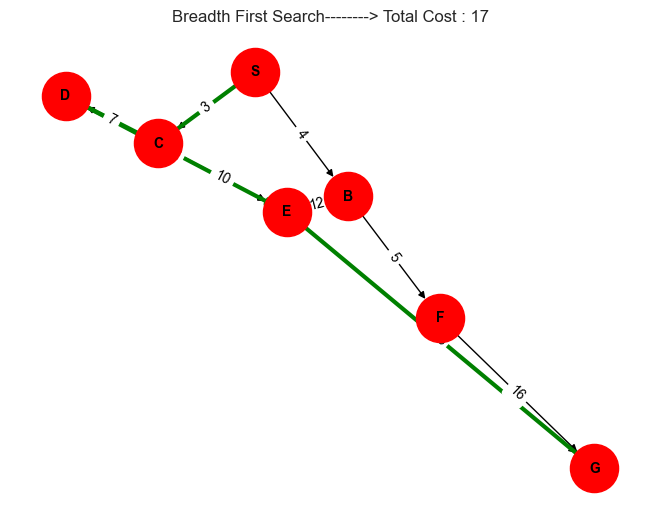

In [40]:
path_edge=list(zip(path,path[1:]))
nx.draw(G,pos,with_labels=True,node_size=1200,node_color="red",font_size=10,font_weight="bold",arrows=True)
nx.draw_networkx_edges(G,pos,edgelist=path_edge,edge_color="green",width=3)
edge_labels=nx.get_edge_attributes(G,"weight")
nx.draw_networkx_edge_labels(G,pos,edge_labels,font_color="black")
plt.title(f'Breadth First Search--------> Total Cost : {total_cost}')
plt.show()